#Understanding and Forecasting Student Performance in
India
###Objective
Analyze student performance data to uncover patterns in academic success across subjects
and demographics. Use statistical analysis and machine learning to predict performance and
identify interventions for improvement — useful for educators and policymakers alike.
###Dataset
• Source: [Kaggle - Student Performance Dataset (Math, Reading, Writing Scores)]
• Link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
Columns include:
• gender, race/ethnicity, parental level of education,
• lunch, test preparation course
• math score, reading score, writing score
Use Cases
• Predict students at risk of underperforming
• Understand how socio-economic and educational backgrounds impact scores
• Recommend interventions (e.g., test prep, tutoring)
• Visualize gaps across gender or ethnicity groups

##SECTION A: Python & Data Cleaning
• Load the dataset and inspect the first few rows, datatypes, and null values.
• Check for duplicate rows or invalid data entries.
• Standardize categorical values (e.g., group education levels, rename ethnicities).
• Add derived columns:
o Average Score = (Math + Reading + Writing)/3
o Performance Category: Low, Medium, High based on average score
o Preparation Effectiveness: Compare scores with and without test prep

##SECTION B: SQL Operations
• Import the cleaned dataset into a SQL database.
• Write SQL queries to:
o List top 5 students with highest average scores.
o Find the average math, reading, and writing scores by gender.
o Compare average scores of students who completed test prep vs. those who
didn’t.
o Count how many students fall into each performance category.
o Identify which ethnic group has the highest average total score.
##SECTION C: Exploratory Data Analysis & Descriptive Statistics
Exploratory Data Analysis:
• Histograms for all three subject scores.
• Box plots comparing scores by gender and parental education level.
• Grouped bar plots of average scores across test preparation and lunch type.
• Heatmap of correlation among numerical features.
• Scatter plot of math vs. reading scores with performance category color-coding.
• Stacked bar chart showing performance category by ethnic group.
• Count plot of number of students in each performance tier by gender.
Descriptive Statistics:
• Calculate mean, median, variance, and standard deviation for all three scores.
• Create summary tables showing average scores per category (e.g., lunch type, test
prep).
• Calculate coefficient of variation for math, reading, and writing scores.
• Rank top 3 factors associated with high performance (based on group averages).
• Determine which feature (e.g., lunch type, gender) has the largest score variance.
###SECTION D: Tableau Dashboard
• Build an interactive dashboard that includes:
o Filters for gender, test prep, parental education
o Line chart comparing average scores by parental education
o Bar chart of performance tiers across ethnic groups
o Pie chart showing proportion of students by lunch type or test prep status
o Score tracker: given a demographic filter, show average subject scores
o Highlight students with highest total scores per group
o Dynamic performance heatmap based on math, reading, writing combinations
###SECTION E: Machine Learning
Regression Task
• Predict total or average score based on demographic features.
• Models to try: Linear Regression, Random Forest Regressor
• Evaluate using MAE, MSE, R²
Classification Task
• Classify students into performance buckets (Low, Medium, High).
• Label encode categorical variables.
• Train and compare:
o Logistic Regression
o Decision Tree
o Random Forest
• Display feature importance from tree-based models

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading The Dataset:
import pandas as pd

# Load CSV from same folder as notebook
data = pd.read_csv('StudentsPerformance.csv')
data.head()

Saving StudentsPerformance.csv to StudentsPerformance (2).csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#checking for Null Values :-
for col in data.columns:
  print(f'{col} : {data[col].isna().sum()}')

gender : 0
race/ethnicity : 0
parental level of education : 0
lunch : 0
test preparation course : 0
math score : 0
reading score : 0
writing score : 0


In [ ]:
for col in data.columns:
  print(f'{col} : {data[col].unique()}')

gender : ['female' 'male']
race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test preparation course : ['none' 'completed']
math score : [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score : [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score : [ 74  88  93 

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
data.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Standardization and Encoding

In [ ]:
data["parental level of education"].replace({
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
},inplace=True)


/tmp/ipython-input-1355176748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["parental level of education"].replace({
/tmp/ipython-input-1355176748.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["parental level of education"].replace({


In [ ]:
#One Hot Encoding
#data = pd.get_dummies(data, columns=['gender'], drop_first=True)


In [ ]:
# standardize strings (lowercase + strip)
##for c in ['race/ethnicity','parental level of education','lunch','test preparation course']:
 ##   data[c] = data[c].str.strip().str.lower()

In [ ]:
#data = pd.get_dummies(data, columns=['race/ethnicity'], drop_first=True)


In [ ]:
lunch_mapping = {'standard': 0, 'free/reduced': 1}
data['lunch'] = data['lunch'].map(lunch_mapping)

In [ ]:
test_mapping = {'none': 0, 'completed': 1}
data['test preparation course'] = data['test preparation course'].map(test_mapping)

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,4,0,0,72,72,74
1,female,group C,2,0,1,69,90,88
2,female,group B,5,0,0,90,95,93
3,male,group A,3,1,0,47,57,44
4,male,group C,2,0,0,76,78,75


In [ ]:
data['average score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)



In [ ]:
# Define performance categories
def categorize_performance(score):
    if score >= 80:
        return 'High'
    elif score >= 60:
        return 'Medium'
    else:
        return 'Low'

data['Performance Category'] = data['average score'].apply(categorize_performance)

data['Performance Category'].replace({
    "High": 0,
    "Medium": 1,
    "Low": 2
},inplace=True)
display(data.head())

/tmp/ipython-input-2254499483.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Performance Category'].replace({
/tmp/ipython-input-2254499483.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Performance Category'].replace({


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,Performance Category
0,female,group B,4,0,0,72,72,74,72.666667,1
1,female,group C,2,0,1,69,90,88,82.333333,0
2,female,group B,5,0,0,90,95,93,92.666667,0
3,male,group A,3,1,0,47,57,44,49.333333,2
4,male,group C,2,0,0,76,78,75,76.333333,1


##EDA

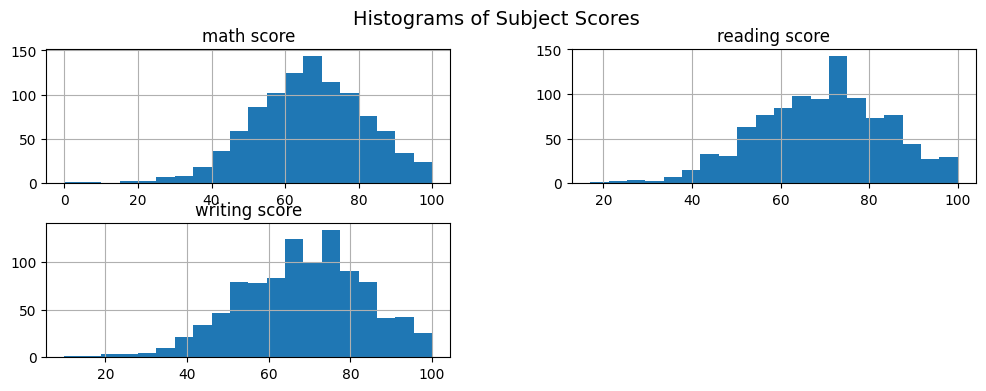

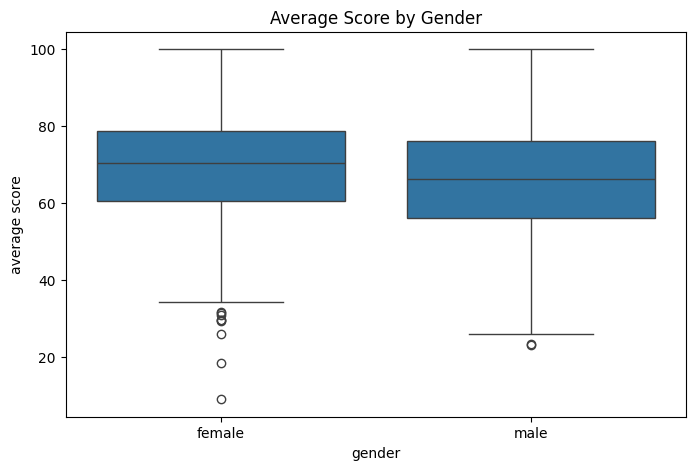

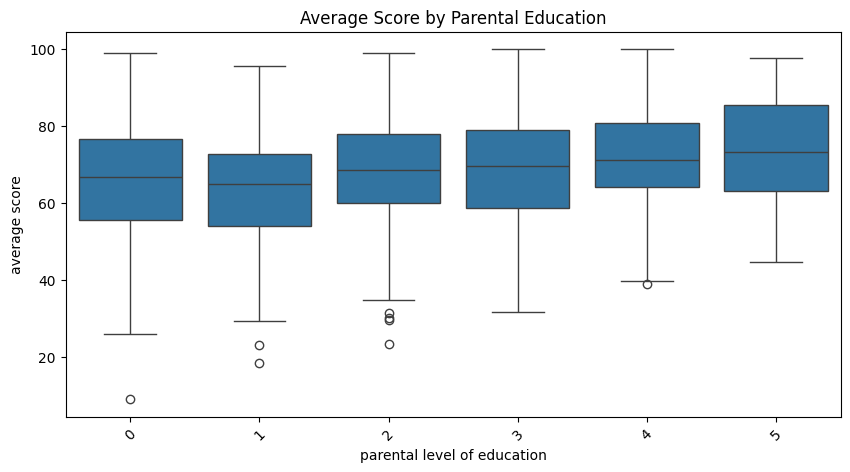

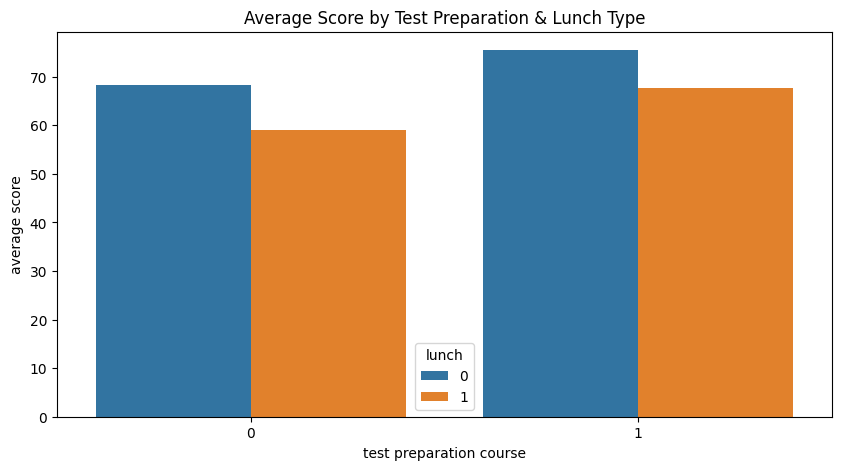

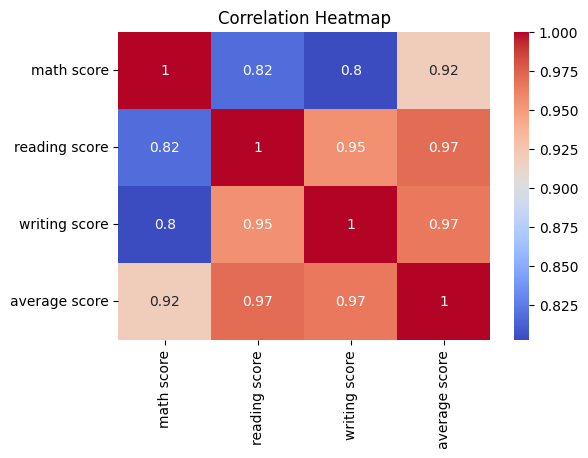

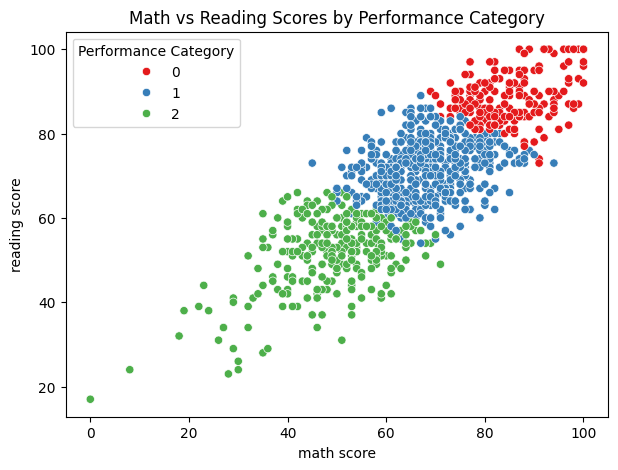

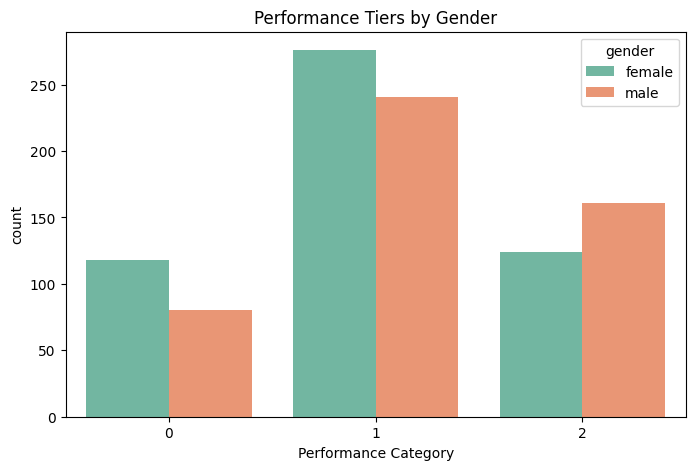

In [ ]:
# HISTOGRAMS for subject scores
data[['math score','reading score','writing score']].hist(bins=20, figsize=(12,4))
plt.suptitle("Histograms of Subject Scores", fontsize=14)
plt.show()

# BOX PLOTS by gender
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='average score', data=data)
plt.title("Average Score by Gender")
plt.show()

# BOX PLOTS by parental education
plt.figure(figsize=(10,5))
sns.boxplot(x='parental level of education', y='average score', data=data)
plt.title("Average Score by Parental Education")
plt.xticks(rotation=45)
plt.show()

# GROUPED BAR PLOTS by test prep & lunch
plt.figure(figsize=(10,5))
sns.barplot(x='test preparation course', y='average score', hue='lunch', data=data, errorbar=None)
plt.title("Average Score by Test Preparation & Lunch Type")
plt.show()

# HEATMAP of correlations among numerical features
plt.figure(figsize=(6,4))
sns.heatmap(data[['math score','reading score','writing score','average score']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# SCATTER PLOT math vs reading, colored by performance category
plt.figure(figsize=(7,5))
sns.scatterplot(x='math score', y='reading score', hue='Performance Category', data=data, palette='Set1')
plt.title("Math vs Reading Scores by Performance Category")
plt.show()

# STACKED BAR CHART performance category by ethnicity
# Need to melt the one-hot encoded race/ethnicity columns for plotting
#race_ethnicity_cols = ['race/ethnicity_group_a', 'race/ethnicity_group_b', 'race/ethnicity_group_c', 'race/ethnicity_group_d', 'race/ethnicity_group_e']
#data_melted = data.melt(id_vars=['Performance Category'], value_vars=race_ethnicity_cols, var_name='Ethnicity', value_name='Is_Present')
#data_melted = data_melted[data_melted['Is_Present'] == True]

#ct = pd.crosstab(data_melted['Ethnicity'], data_melted['Performance Category'])
#ct.plot(kind='bar', stacked=True, figsize=(10,5), colormap="tab20c")
#plt.title("Performance Category Distribution by Ethnic Group")
#plt.ylabel("Count")
#plt.xticks(rotation=45, ha='right')
#plt.show()

# COUNT PLOT of students in each performance tier by gender
plt.figure(figsize=(8,5))
sns.countplot(x='Performance Category', hue='gender', data=data, palette="Set2")
plt.title("Performance Tiers by Gender")
plt.show()

In [ ]:
##descriptive Stats
import numpy as np


# 1. Mean, Median, Variance, Standard Deviation

stats = data[['math score','reading score','writing score']].agg(['mean','median','var','std'])
print(" Mean, Median, Variance, Std Dev for Scores:")
print(stats)


# 2. Summary tables (average scores per category)


# By lunch type
print("\n Average scores by Lunch Type:")
print(data.groupby('lunch')[['math score','reading score','writing score','average score']].mean())

# By test prep status
print("\n Average scores by Test Preparation Course:")
print(data.groupby('test preparation course')[['math score','reading score','writing score','average score']].mean())


# 3. Coefficient of Variation (CV = std / mean)

print("\n Coefficient of Variation (CV):")
for col in ['math score','reading score','writing score']:
    cv = data[col].std() / data[col].mean()
    print(f"{col}: {cv:.3f}")


# 4. Rank top 3 factors linked with high performance
# (compare average_score by categorical features)

factors = {}

for col in ['gender','parental level of education','lunch','test preparation course']:
    factors[col] = data.groupby(col)['average score'].mean().mean()  # mean of group means

factors_sorted = sorted(factors.items(), key=lambda x: x[1], reverse=True)
print("\n Top 3 factors associated with high performance:")
print(factors_sorted[:3])

#5 Determine which feature (e.g., lunch type, gender) has the largest score variance.

    # Add derived column for total score
data["total_score"] = data[["math score", "reading score", "writing score"]].sum(axis=1)

    # Define categorical features
categorical_features = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

# Store results
results = []

for feature in categorical_features:
    group_var = data.groupby(feature)["total_score"].var()
    max_group = group_var.idxmax()
    max_value = group_var.max()
    results.append((feature, max_group, max_value))

# Convert results to DataFrame for better readability
variance_summary = pd.DataFrame(results, columns=["Feature", "Group with Highest Variance", "Variance"])
print(variance_summary)

# Find the feature with the largest overall variance
largest_variance_feature = variance_summary.loc[variance_summary["Variance"].idxmax()]
print("\nFeature with the largest variance overall:")
print(largest_variance_feature)



 Mean, Median, Variance, Std Dev for Scores:
        math score  reading score  writing score
mean     66.089000      69.169000      68.054000
median   66.000000      70.000000      69.000000
var     229.918998     213.165605     230.907992
std      15.163080      14.600192      15.195657

 Average scores by Lunch Type:
       math score  reading score  writing score  average score
lunch                                                         
0       70.034109      71.654264      70.823256      70.837209
1       58.921127      64.653521      63.022535      62.199061

 Average scores by Test Preparation Course:
                         math score  reading score  writing score  \
test preparation course                                             
0                         64.077882      66.534268      64.504673   
1                         69.695531      73.893855      74.418994   

                         average score  
test preparation course                 
0                     

In [ ]:
#MACHINE LEARNING
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,confusion_matrix,classification_report, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


In [ ]:
data.head()
data.columns

Index(['parental level of education', 'lunch', 'test preparation course',
       'math score', 'reading score', 'writing score', 'average score',
       'Performance Category', 'total_score', 'gender_male',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E'],
      dtype='object')

####ENCODING FOR MACHINE LEARNING

In [ ]:
#One Hot Encoding
data = pd.get_dummies(data, columns=['gender'], drop_first=True)
data = pd.get_dummies(data, columns=['race/ethnicity'], drop_first=True)


In [ ]:
X = data.drop(['average score','Performance Category','total_score'], axis=1)
y = data['average score']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)


##REGRESSION TASK

####LINEAR REGRESSION

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
 prediction = model.predict(X_test)


In [ ]:
#metrics
display(r2_score(y_test,prediction))
display(mean_squared_error(y_test,prediction))

1.0

2.3269962411464902e-28

In [ ]:
data.head(2)
data['Performance Category'].unique()

array([1, 0, 2])

#####KNN REGRESSION

In [ ]:
# Initialize model
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit model
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn_reg = knn_reg.predict(X_test)

# Evaluation
print("🔹 KNN Regression Metrics:")
print("R² Score:", r2_score(y_test, y_pred_knn_reg))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_knn_reg))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_knn_reg))

🔹 KNN Regression Metrics:
R² Score: 0.9922702563466301
Mean Squared Error (MSE): 1.7159595959595952
Mean Absolute Error (MAE): 0.566060606060606


####CLASSIFICATION TASK


#####LOGISTIC REGRESSION

In [ ]:
 Xclass = data.drop(['average score','Performance Category','total_score'], axis=1)
 yclass = data['Performance Category']
 Xclass_train,Xclass_test,yclass_train,yclass_test = train_test_split(Xclass,yclass,test_size=0.33,random_state=42)


In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xclass_train_scaled = scaler.fit_transform(Xclass_train)
Xclass_test_scaled = scaler.transform(Xclass_test)

model_class = LogisticRegression(max_iter=1000)
model_class.fit(Xclass_train_scaled, yclass_train)

LogisticRegression(max_iter=1000)

In [ ]:
#METRICS

yclass_pred = model_class.predict(Xclass_test_scaled)

print("Accuracy:", accuracy_score(yclass_test, yclass_pred))
print("\nClassification Report:\n", classification_report(yclass_test, yclass_pred))
print("\nConfusion Matrix:\n", confusion_matrix(yclass_test, yclass_pred))


Accuracy: 0.9787878787878788

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.97      0.99      0.98       168
           2       1.00      0.98      0.99       102

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.98       330
weighted avg       0.98      0.98      0.98       330


Confusion Matrix:
 [[ 57   3   0]
 [  2 166   0]
 [  0   2 100]]


#####KNN CLASSIFICATION

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors=5)

# Fit model on scaled data
knn_class.fit(Xclass_train_scaled, yclass_train)

# Predictions
yclass_pred_knn = knn_class.predict(Xclass_test_scaled)

# Evaluation
print("🔹 KNN Classification Metrics:")
print("Accuracy:", accuracy_score(yclass_test, yclass_pred_knn))
print("\nClassification Report:\n", classification_report(yclass_test, yclass_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(yclass_test, yclass_pred_knn))

🔹 KNN Classification Metrics:
Accuracy: 0.8424242424242424

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.62      0.74        60
           1       0.80      0.92      0.86       168
           2       0.89      0.85      0.87       102

    accuracy                           0.84       330
   macro avg       0.87      0.80      0.82       330
weighted avg       0.85      0.84      0.84       330


Confusion Matrix:
 [[ 37  23   0]
 [  3 154  11]
 [  0  15  87]]


#####DECISION TREES

In [ ]:
dt_model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42) ##using Entropy
dt_model_gini = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42) ##Gini Index


In [ ]:
#Training Data
dt_model_entropy.fit(Xclass_train, yclass_train)
dt_model_gini.fit(Xclass_train, yclass_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:

# Predictions
y_pred_entropy = dt_model_entropy.predict(Xclass_test)
y_pred_gini = dt_model_gini.predict(Xclass_test)

# Evaluation for Entropy
print(" 1. Decision Tree (Entropy)")
print("Accuracy:", accuracy_score(yclass_test, y_pred_entropy))
print("\nClassification Report:\n", classification_report(yclass_test, y_pred_entropy))
print("\nConfusion Matrix:\n", confusion_matrix(yclass_test, y_pred_entropy))

# --- Evaluation for Gini ---
print("\n 2. Decision Tree (Gini)")
print("Accuracy:", accuracy_score(yclass_test, y_pred_gini))
print("\nClassification Report:\n", classification_report(yclass_test, y_pred_gini))
print("\nConfusion Matrix:\n", confusion_matrix(yclass_test, y_pred_gini))


 1. Decision Tree (Entropy)
Accuracy: 0.9575757575757575

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        60
           1       0.95      0.96      0.96       168
           2       0.94      0.98      0.96       102

    accuracy                           0.96       330
   macro avg       0.97      0.95      0.96       330
weighted avg       0.96      0.96      0.96       330


Confusion Matrix:
 [[ 54   6   0]
 [  0 162   6]
 [  0   2 100]]

 2. Decision Tree (Gini)
Accuracy: 0.9424242424242424

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91        60
           1       0.93      0.96      0.94       168
           2       0.96      0.95      0.96       102

    accuracy                           0.94       330
   macro avg       0.95      0.93      0.94       330
weighted avg       0.94      0.94      0.94       330


Confusion

In [ ]:
# Display feature importance from tree-based models


# 1 .Feature Importance for Entropy
feature_importance_entropy = pd.DataFrame({
    'Feature': Xclass_train.columns,
    'Importance': dt_model_entropy.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("🔹 Feature Importance (Entropy):")
print(feature_importance_entropy)

# 2. Feature Importance for Gini
feature_importance_gini = pd.DataFrame({
    'Feature': Xclass_train.columns,
    'Importance': dt_model_gini.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔹 Feature Importance (Gini):")
print(feature_importance_gini)


🔹 Feature Importance (Entropy):
                        Feature  Importance
5                 writing score    0.454564
4                 reading score    0.354122
3                    math score    0.191314
2       test preparation course    0.000000
1                         lunch    0.000000
0   parental level of education    0.000000
6                   gender_male    0.000000
7        race/ethnicity_group B    0.000000
8        race/ethnicity_group C    0.000000
9        race/ethnicity_group D    0.000000
10       race/ethnicity_group E    0.000000

🔹 Feature Importance (Gini):
                        Feature  Importance
5                 writing score    0.459402
4                 reading score    0.389666
3                    math score    0.139331
9        race/ethnicity_group D    0.011601
2       test preparation course    0.000000
0   parental level of education    0.000000
1                         lunch    0.000000
6                   gender_male    0.000000
7        race/

##SECTION B: SQL Operations


Altering column names to make it more suitable : ALTER TABLE studentsperformance RENAME COLUMN "race/ethnicity" TO race_ethnicity;
ALTER TABLE studentsperformance RENAME COLUMN "parental level of education" TO parental_level_of_education;
ALTER TABLE studentsperformance RENAME COLUMN "test preparation course" TO test_preparation_course;
ALTER TABLE studentsperformance RENAME COLUMN "math score" TO math_score;
ALTER TABLE studentsperformance RENAME COLUMN "reading score" TO reading_score;
ALTER TABLE studentsperformance RENAME COLUMN "writing score" TO writing_score;
--ALTER TABLE studentsperformance RENAME COLUMN "average score" TO average_score;
ALTER TABLE studentsperformance RENAME COLUMN "Performance Category" TO performance_category;
ALTER TABLE studentsperformance RENAME COLUMN "total_score" TO total_score;


1. List top 5 students with highest average scores.


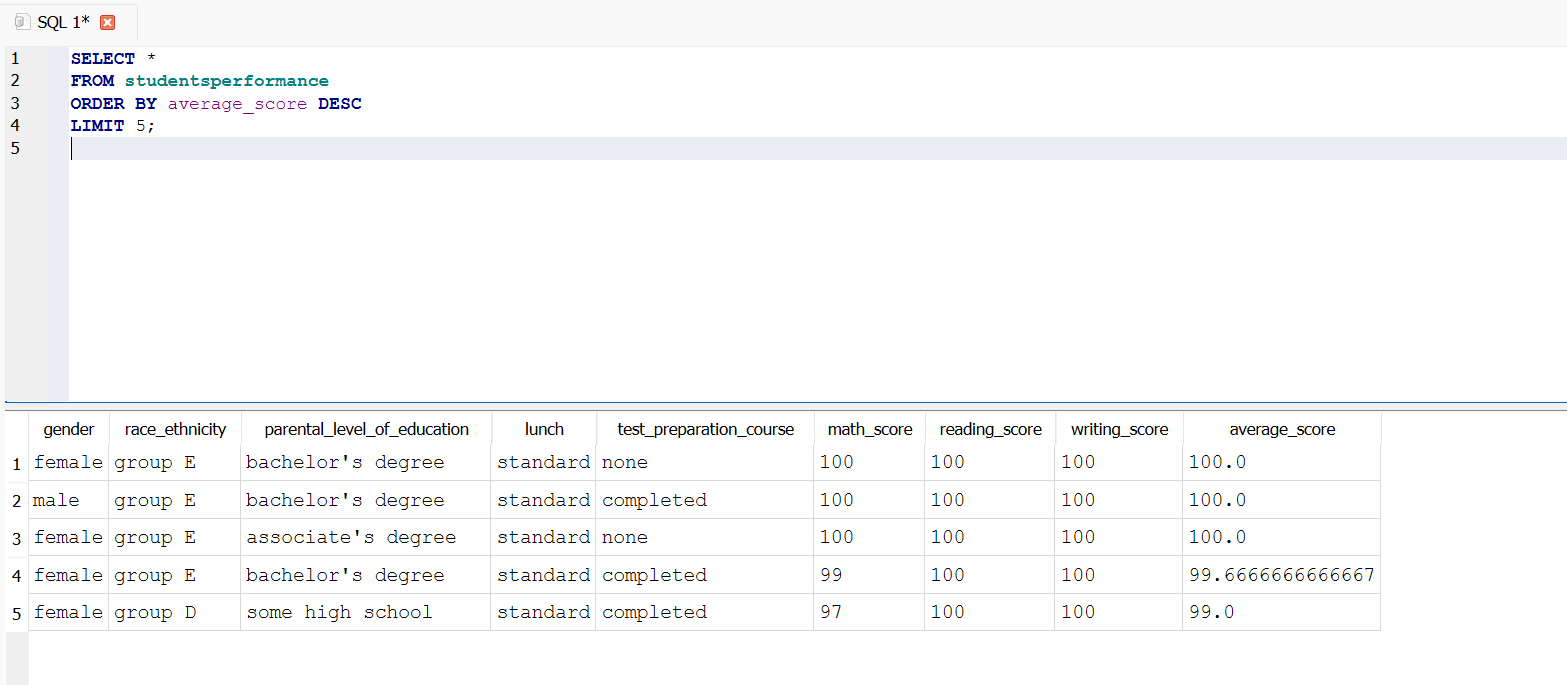

2. Find the average math, reading, and writing scores by gender.




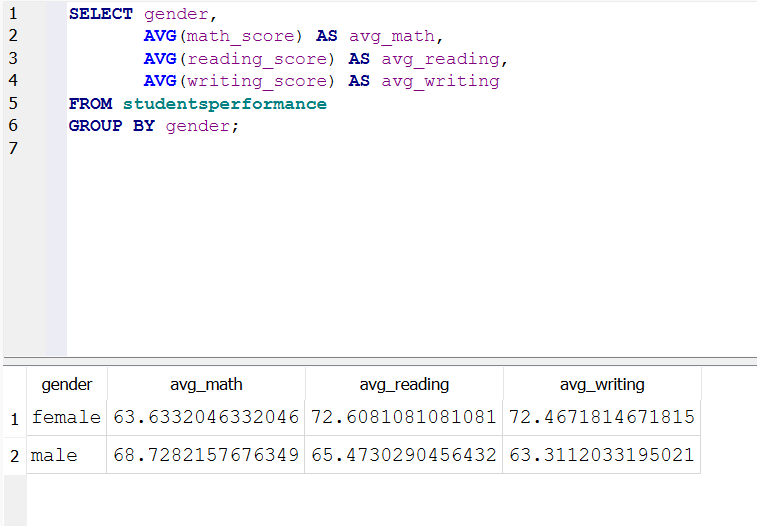

3.Compare average scores of students who completed test prep vs. those who
didn’t.

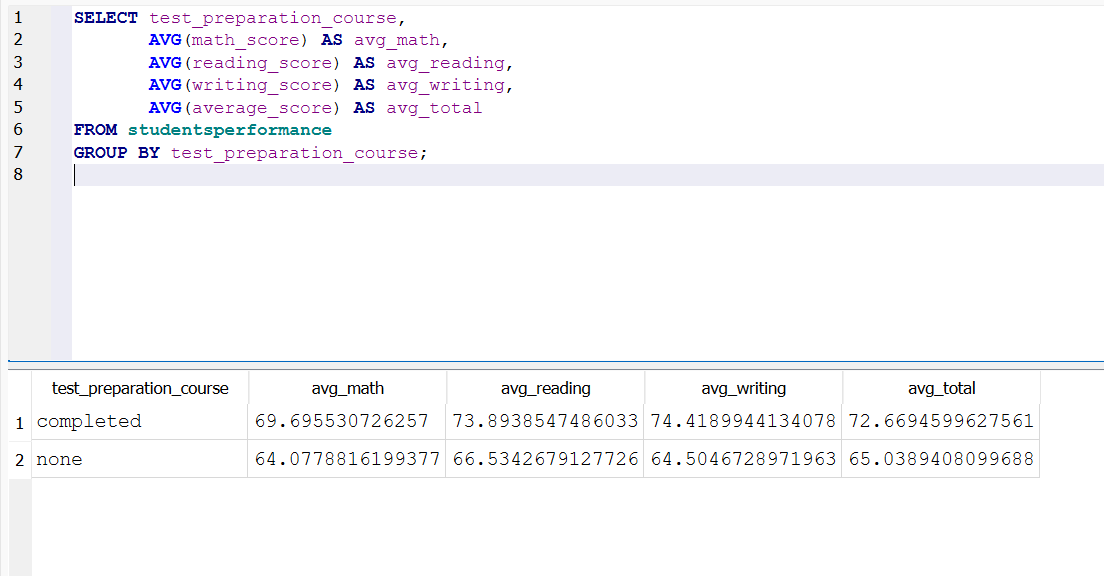

4. Count how many students fall into each performance category.


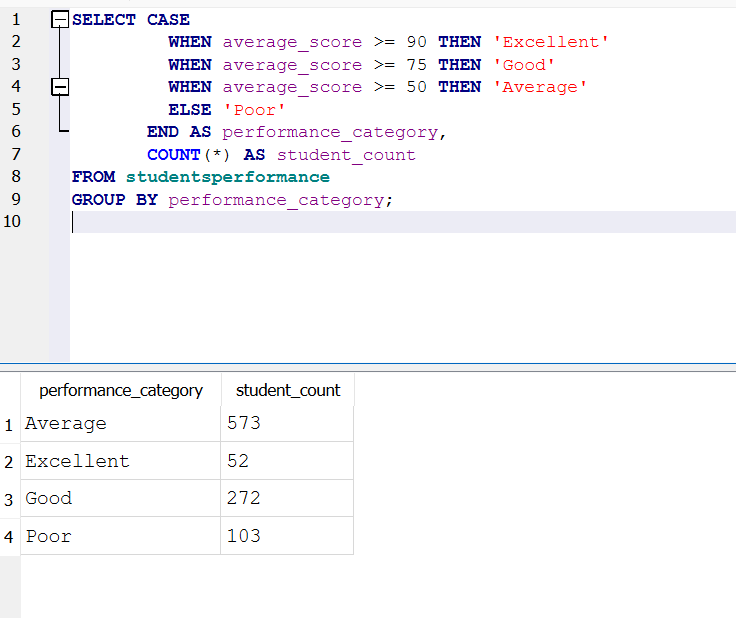

5. Identify which ethnic group has the highest average total score.

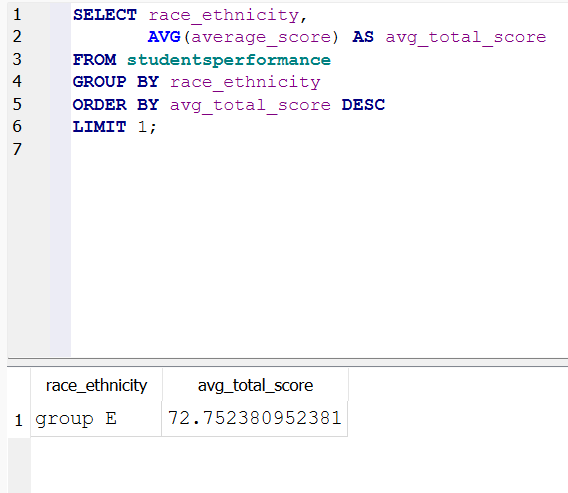